In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
%cd /content/drive/MyDrive/CS116

/content/drive/MyDrive/CS116


In [20]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import load_model, Model
import tensorflow as tf
import keras
import matplotlib.pyplot as plt


class MyCNN:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    C1 = Conv2D(6, (3, 3), padding='same', activation='relu')(input)
    S2 = MaxPooling2D(pool_size=(2, 2), padding="same")(C1)
    C3 = Conv2D(16, (3, 3), padding='same', activation='relu')(S2)
    S4 = MaxPooling2D(pool_size=(2, 2), padding="same")(C3)

    flat = Flatten()(S4)
    # These like ANN
    F5 = Dense(120, activation='relu', use_bias=True)(flat)
    F6 = Dense(84, activation='relu', use_bias=True)(F5)
    output = Dense(10, activation='softmax', use_bias=True)(F6) # y~ output
    self.model = Model(input, output)
  
  # Train the model
  def train(self, x_train, y_train): # x_train chinh la X, y_train chinh la ground-truth
    sgd = keras.optimizers.SGD(learning_rate=0.01)
    self.model.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
    self.model.fit(x_train, y_train, epochs = 50, batch_size = 128)
  
  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)
  def evaluate(self, x_test, y_test):
    return self.model.evaluate(x_test, y_test)

In [21]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [22]:
import numpy as np

def onehot(y):
  oh = np.zeros((y.shape[0], 10))
  for i in range(y.shape[0]):
    oh[i, int(y[i])]=1
  return oh

In [23]:
from sklearn import preprocessing
import numpy as np

# Normalize train data
y_train_oh = onehot(y_train)
y_train_oh.shape

y_test_oh = onehot(y_test)
y_test_oh.shape

x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [24]:
x_train_norm.shape

(60000, 28, 28)

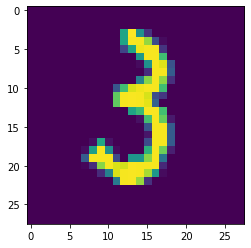

Label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [25]:
import matplotlib.pyplot as plt

# Visualize training data
plt.imshow(x_train[1234])
plt.show()
print('Label: ', y_train_oh[1234])

In [26]:
# Build and train CNN model
cnn = MyCNN()
cnn.build((28, 28, 1))
cnn.train(x_train_norm, y_train_oh)

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 1.2878 - accuracy: 0.5888
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3146 - accuracy: 0.9043
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2216 - accuracy: 0.9325
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1771 - accuracy: 0.9459
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1495 - accuracy: 0.9547
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1306 - accuracy: 0.9605
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1158 - accuracy: 0.9647
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1063 - accuracy: 0.9679
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0974 - accuracy: 0.9706
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0911 - accuracy: 0.9724

In [27]:
# Câu 1: Hãy viết code để tính độ chính xác trên tập test
cnn.evaluate(x_test_norm, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.0524 - accuracy: 0.9834


[0.052434053272008896, 0.9833999872207642]

In [28]:
# Câu 2: Hãy thử nghiệm với kiến trúc sau:
#   - Từ kiến trúc MyCNN gốc, hãy loại bỏ hết bước MaxPooling --> Tính độ chính xác trên tập test
class MyCNN_withoutMaxPooling:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    C1 = Conv2D(6, (3, 3), padding='same', activation='relu')(input)
    # S2 = MaxPooling2D(pool_size=(2, 2), padding="same")(C1)
    C3 = Conv2D(16, (3, 3), padding='same', activation='relu')(C1)
    # S4 = MaxPooling2D(pool_size=(2, 2), padding="same")(C3)

    flat = Flatten()(C3)
    # These like ANN
    F5 = Dense(120, activation='relu', use_bias=True)(flat)
    F6 = Dense(84, activation='relu', use_bias=True)(F5)
    output = Dense(10, activation='softmax', use_bias=True)(F6) # y~ output
    self.model = Model(input, output)
  
  # Train the model
  def train(self, x_train, y_train): # x_train chinh la X, y_train chinh la ground-truth
    sgd = keras.optimizers.SGD(learning_rate=0.01)
    self.model.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
    self.model.fit(x_train, y_train, epochs = 50, batch_size = 128)
  
  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)

  def evaluate(self, x_test, y_test):
    return self.model.evaluate(x_test, y_test)

In [29]:
# Build and train CNN model
cnn = MyCNN_withoutMaxPooling()
cnn.build((28, 28, 1))
cnn.train(x_train_norm, y_train_oh)

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 0.5865 - accuracy: 0.8336
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2107 - accuracy: 0.9372
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1624 - accuracy: 0.9511
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1360 - accuracy: 0.9585
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1162 - accuracy: 0.9652
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1046 - accuracy: 0.9682
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0955 - accuracy: 0.9707
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0863 - accuracy: 0.9736
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0796 - accuracy: 0.9757
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0737 - accuracy: 0.9772

In [30]:
cnn.evaluate(x_test_norm, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.0898 - accuracy: 0.9791


[0.08983249217271805, 0.9790999889373779]

In [31]:
# Câu 3: Hãy thử nghiệm với kiến trúc sau:
#   - Từ kiến trúc MyCNN gốc, hãy loại bỏ hết activation --> Tính độ chính xác trên tập test
class MyCNN_withoutActivation:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    C1 = Conv2D(6, (3, 3), padding='same', activation='relu')(input)
    S2 = MaxPooling2D(pool_size=(2, 2), padding="same")(C1)
    C3 = Conv2D(16, (3, 3), padding='same', activation='relu')(S2)
    S4 = MaxPooling2D(pool_size=(2, 2), padding="same")(C3)

    flat = Flatten()(S4)
    # These like ANN
    F5 = Dense(120, activation=None, use_bias=True)(flat)
    F6 = Dense(84, activation=None, use_bias=True)(F5)
    output = Dense(10, activation=None, use_bias=True)(F6) # y~ output
    self.model = Model(input, output)
  
  # Train the model
  def train(self, x_train, y_train): # x_train chinh la X, y_train chinh la ground-truth
    sgd = keras.optimizers.SGD(learning_rate=0.01)
    self.model.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
    self.model.fit(x_train, y_train, epochs = 50, batch_size = 128)
  
  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)

  def evaluate(self, x_test, y_test):
    return self.model.evaluate(x_test, y_test)

In [32]:
# Build and train CNN model
cnn = MyCNN_withoutActivation()
cnn.build((28, 28, 1))
cnn.train(x_train_norm, y_train_oh)

Epoch 1/50
469/469 [==============================] - 2s 4ms/step - loss: 7.7051 - accuracy: 0.0813
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 7.8724 - accuracy: 0.0774
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 7.8936 - accuracy: 0.0764
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 7.8092 - accuracy: 0.0758
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 7.8366 - accuracy: 0.0757
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 7.8560 - accuracy: 0.0754
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 7.8355 - accuracy: 0.0752
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 7.8133 - accuracy: 0.0750
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 7.8329 - accuracy: 0.0748
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 7.8415 - accuracy: 0.0748

In [33]:
cnn.evaluate(x_test_norm, y_test_oh)

313/313 [==============================] - 1s 2ms/step - loss: 7.7093 - accuracy: 0.0800


[7.709282875061035, 0.07999999821186066]

In [34]:
# Câu 4: Hãy thử nghiệm với kiến trúc sau:
#   - Từ kiến trúc MyCNN gốc, hãy loại bỏ hết Conv2D --> Tính độ chính xác trên tập test
class MyCNN_withoutConv2D:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    # C1 = Conv2D(6, (3, 3), padding='same', activation='relu')(input)
    S2 = MaxPooling2D(pool_size=(2, 2), padding="same")(input)
    # C3 = Conv2D(16, (3, 3), padding='same', activation='relu')(S2)
    S4 = MaxPooling2D(pool_size=(2, 2), padding="same")(S2)

    flat = Flatten()(S4)
    # These like ANN
    F5 = Dense(120, activation='relu', use_bias=True)(flat)
    F6 = Dense(84, activation='relu', use_bias=True)(F5)
    output = Dense(10, activation='softmax', use_bias=True)(F6) # y~ output
    self.model = Model(input, output)
  
  # Train the model
  def train(self, x_train, y_train): # x_train chinh la X, y_train chinh la ground-truth
    sgd = keras.optimizers.SGD(learning_rate=0.01)
    self.model.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
    self.model.fit(x_train, y_train, epochs = 50, batch_size = 128)
  
  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)

  def evaluate(self, x_test, y_test):
    return self.model.evaluate(x_test, y_test)

In [35]:
# Build and train CNN model
cnn = MyCNN_withoutConv2D()
cnn.build((28, 28, 1))
cnn.train(x_train_norm, y_train_oh)

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 1.8792 - accuracy: 0.4827
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 1.1327 - accuracy: 0.7028
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.8398 - accuracy: 0.7514
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.7201 - accuracy: 0.7845
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.6522 - accuracy: 0.8008
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.6095 - accuracy: 0.8112
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.5810 - accuracy: 0.8169
Epoch 8/50
469/469 [==============================] - 1s 3ms/step - loss: 0.5613 - accuracy: 0.8213
Epoch 9/50
469/469 [==============================] - 1s 3ms/step - loss: 0.5459 - accuracy: 0.8268
Epoch 10/50
469/469 [==============================] - 1s 3ms/step - loss: 0.5339 - accuracy: 0.8292

In [36]:
cnn.evaluate(x_test_norm, y_test_oh)

313/313 [==============================] - 1s 2ms/step - loss: 0.3700 - accuracy: 0.8844


[0.37002840638160706, 0.8844000101089478]

##Nhận xét:


*   Khi loại bỏ MaxPooling, accuracy không đổi.
*   Khi loại bỏ Activation, accuracy về còn khoảng 11% vì mạng CNN chọn ngẫu nhiên 1 lớp và dự đoán tất cả đều là lớp đó.
* Khi loại bỏ lớp Con2D, accuracy giảm một ít.

